In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

**Toy data**

In [135]:
x_min = -0.5
x_max =  1.5
n = 10

x_cls0 = np.random.multivariate_normal([0., 0.], np.diag([0.2, 0.1]), n).clip(0.9*x_min, 0.9*x_max)
x_cls1 = np.random.multivariate_normal([1., 1.], np.diag([0.1, 0.2]), n).clip(0.9*x_min, 0.9*x_max)
y_cls0 = 0. * np.ones(n)
y_cls1 = 1. * np.ones(n)

X = np.array([*x_cls0, *x_cls1])
Z = np.array([[x[0], x[1], x[0]**2, x[1]**2] for x in X])
y = np.array([*y_cls0, *y_cls1])

# clf = LogisticRegression().fit(X, y)
clf = LogisticRegression().fit(Z, y)

**Baseline: Logistic Regression**

In [136]:
k = 100
y_pred_cls0 = np.zeros((k, k))
y_pred_cls1 = np.zeros((k, k))
decision_boundary = []
for i, x1 in enumerate(np.linspace(x_min, x_max, k)):
    for j, x2 in enumerate(np.linspace(x_min, x_max, k)):
        x = np.array([x1, x2])
        z = np.array([x1, x2, x1**2, x2**2])
        _y0 = clf.predict_proba([z])[0, 0]  # 0th example in batch, 0th class
        _y1 = clf.predict_proba([z])[0, 1]  # 0th example in batch, 0th class
        # _y0 = clf.predict_proba([x])[0, 0]  # 0th example in batch, 0th class
        # _y1 = clf.predict_proba([x])[0, 1]  # 0th example in batch, 0th class
        y_pred_cls0[i, j] = _y0
        y_pred_cls1[i, j] = _y1
        if 0.495 < _y0 < 0.505:
            decision_boundary.append([x1, x2])

decision_boundary = np.array(decision_boundary)

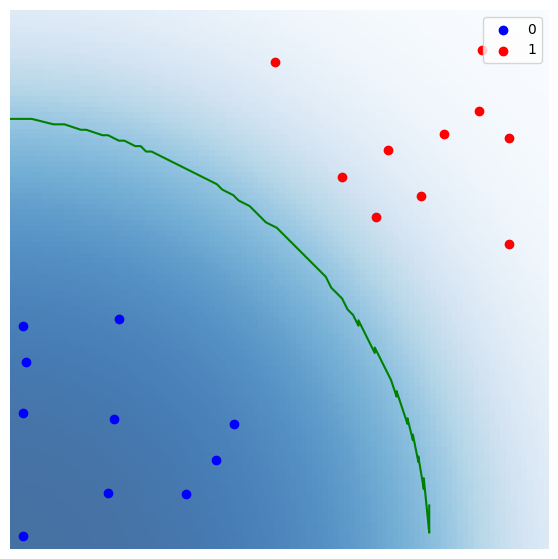

In [137]:
plt.figure(figsize=(7, 7))
plt.axis("off")
plt.scatter(x_cls0[:,0], x_cls0[:,1], color="blue", label="0")
plt.scatter(x_cls1[:,0], x_cls1[:,1], color="red", label="1")
plt.plot(decision_boundary[:,0], decision_boundary[:,1], color="green")
plt.imshow(y_pred_cls0, extent=[x_min, x_max, x_min, x_max], vmin=0, vmax=1, cmap="Blues", origin="lower", alpha=0.75)
# plt.imshow(y_pred_cls1, extent=[x_min, x_max, x_min, x_max], vmin=0, vmax=1, cmap="Reds", origin="lower", alpha=0.75)
plt.legend();

**Predictive coding**

In [139]:
import torch.nn.functional as F

In [140]:
F

<module 'torch.nn.functional' from '/Users/janikeuskirchen/miniforge3/envs/evo/lib/python3.10/site-packages/torch/nn/functional.py'>